In [1]:
import numpy as np
import pyFDS
import matplotlib.pyplot as plt
import pyExSi as es

# Random (flat-shaped PSD)

### Import data

In [2]:
fs = 15000 # sampling frequency [Hz]


time= 1

N = int(time*fs) # number of data points of time signal
t = np.arange(0,N)/fs # time vector

# define frequency vector and one-sided flat-shaped PSD
freq_flat = np.arange(0, fs/2, 1/time) # frequency vector
freq_lower = 200 # PSD lower frequency limit  [Hz]
freq_upper = 1000 # PSD upper frequency limit [Hz]
PSD_flat = es.get_psd(freq_flat, freq_lower, freq_upper,variance=800) # one-sided flat-shaped PSD


#get gaussian stationary signal
gausian_signal = es.random_gaussian(N, PSD_flat, fs)

In [3]:
freq_flat[1]

1.0

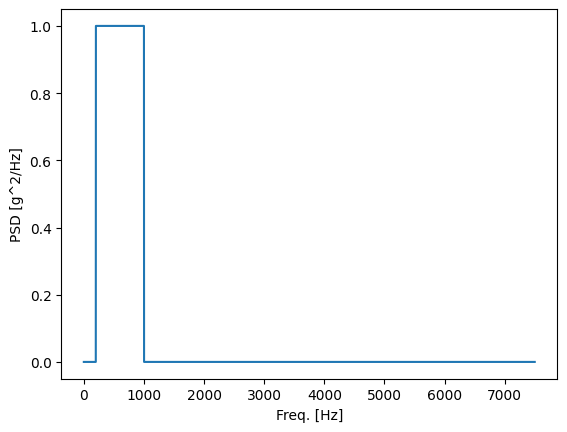

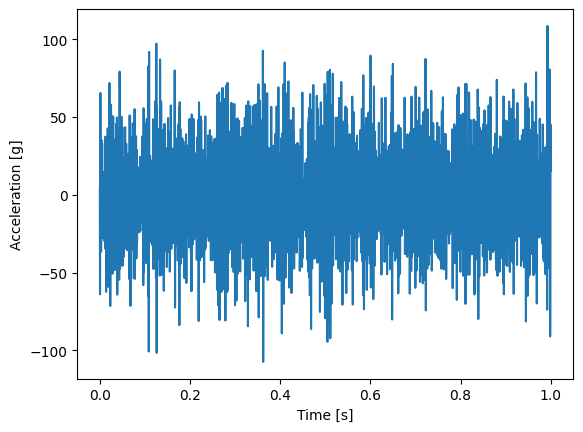

In [4]:
plt.plot(freq_flat, PSD_flat)
plt.xlabel('Freq. [Hz]')
plt.ylabel('PSD [g^2/Hz]')
#plt.ylim(0.9,1.1)
plt.show()

plt.plot(t,gausian_signal)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]')
plt.show()

## Instantiate Class

In [5]:
sd_flat_psd = pyFDS.SpecificationDevelopment(freq_data=(5,2000,1),damp=0.05)
sd_flat_time = pyFDS.SpecificationDevelopment(freq_data=(5,2000,1),damp=0.05)
sd_flat_time_2 = pyFDS.SpecificationDevelopment(freq_data=(5,2000,1),damp=0.05)

## Set Load

In [6]:
sd_flat_psd.set_random_load((PSD_flat,freq_flat), unit='ms2',T=1) #input is tuple (psd array, freq array)
sd_flat_time.set_random_load((gausian_signal,1/fs), unit='ms2',method='convolution') #input is tuple (psd array, freq array)
sd_flat_time_2.set_random_load((gausian_signal,1/fs), unit='ms2',method='psd_averaging',bins=10, T=1) #input is tuple (psd array, freq array)

## Get ERS and FDS

In [7]:
sd_flat_psd.get_ers()
sd_flat_time.get_ers()
sd_flat_time_2.get_ers()

100%|██████████| 7500/7500 [00:00<00:00, 8473.20it/s]


Calculating extreme response for each SDOF system...


100%|██████████| 751/751 [00:00<00:00, 8573.74it/s]


In [8]:
b=10
C=1e80
K=6.3*1e10

sd_flat_psd.get_fds(b=b,C=C,K=K)
sd_flat_time.get_fds(b=b,C=C,K=K)
sd_flat_time_2.get_fds(b=b,C=C,K=K)

100%|██████████| 7500/7500 [00:00<00:00, 8227.48it/s]


Calculating extreme response for each SDOF system...


100%|██████████| 751/751 [00:00<00:00, 5853.57it/s]


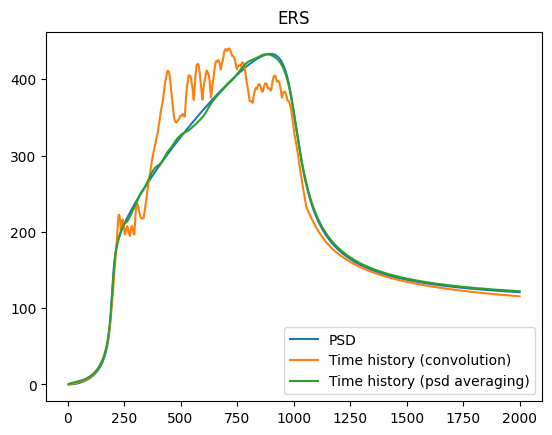

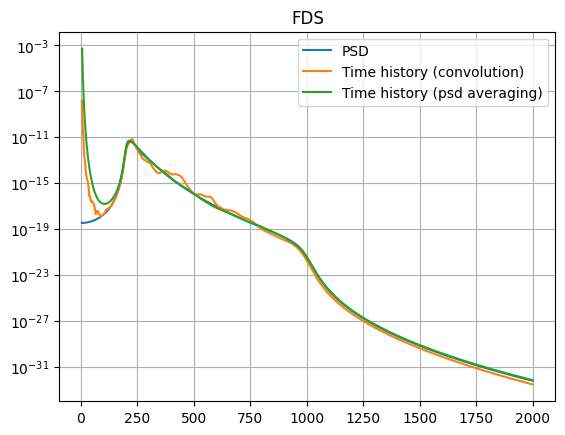

In [9]:
plt.plot(sd_flat_psd.f0_range,sd_flat_psd.ers,label='PSD')
plt.plot(sd_flat_time.f0_range,sd_flat_time.ers,label='Time history (convolution)')
plt.plot(sd_flat_time_2.f0_range,sd_flat_time_2.ers,label='Time history (psd averaging)')
plt.title('ERS')
plt.legend()
plt.show()

plt.semilogy(sd_flat_psd.f0_range,sd_flat_psd.fds,label='PSD')
plt.semilogy(sd_flat_time.f0_range,sd_flat_time.fds,label='Time history (convolution)')
plt.semilogy(sd_flat_time_2.f0_range,sd_flat_time_2.fds,label='Time history (psd averaging)')
plt.title('FDS')
plt.legend()
#plt.xlim(150,250)
plt.grid()
plt.show()

In [67]:
sd_flat_time.T

1

In [68]:
import rainflow

In [13]:
b = 5
C = 1
K = 1

z = pyFDS.tools.response_relative_displacement(gausian_signal, 1/fs, f_0=500, damp=sd_flat_time.damp)
rf = rainflow.count_cycles(z)
rf = np.asarray(rf)
#cyc_sum = np.sum(rf[:,1] * rf[:,0]**b)

#D_i = K**b / (2*C) * cyc_sum


In [14]:
z

array([4.54747351e-21, 3.54002592e-07, 7.99886966e-07, ...,
       1.16273100e-05, 1.19325107e-05, 1.11822022e-05])

In [15]:
rf

array([[1.44080422e-09, 1.00000000e+00],
       [2.44265415e-09, 1.00000000e+00],
       [4.71906714e-09, 1.00000000e+00],
       ...,
       [6.84807392e-05, 5.00000000e-01],
       [7.46483808e-05, 5.00000000e-01],
       [7.51501871e-05, 5.00000000e-01]])

In [16]:
fs

15000

# Random (Industry standard profile example)

## Get ERS and FDS

### Import data

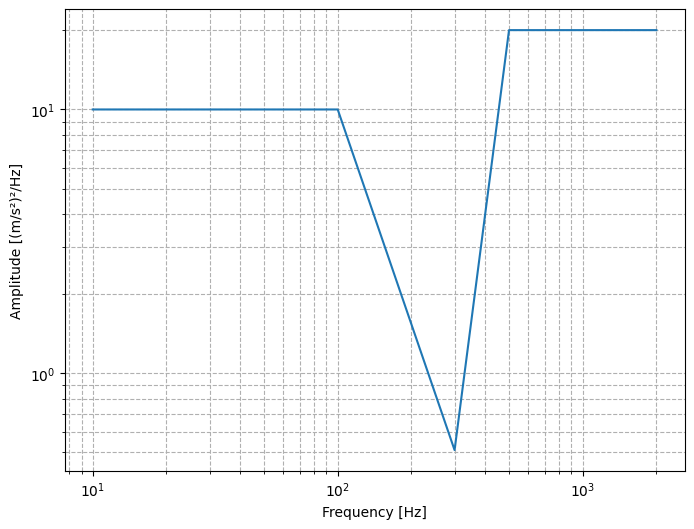

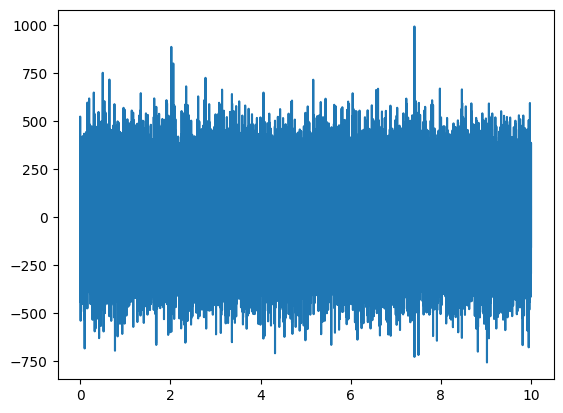

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fs = 10000 # sampling frequency [Hz]


time= 10

N = time*fs # number of data points of time signal
t = np.arange(0,N)/fs # time vector

# Given input table (frequency in Hz and amplitude in (m/s^2)^2/Hz)
freq_input = np.array([10, 100, 300, 500, 2000])
psd_input = np.array([10, 10, 0.51, 20, 20])

# Create the frequency vector
freq_test = np.arange(freq_input[0], freq_input[-1], 1/time)

# Logarithmic interpolation
log_freq_input = np.log10(freq_input)
log_psd_input = np.log10(psd_input)

# Interpolate in log-log space
log_psd_test = np.interp(np.log10(freq_test), log_freq_input, log_psd_input)

# Convert back to linear space
psd_test = 10**log_psd_test

test_time = es.random_gaussian(N, psd_test, fs)

# Plotting the result to verify
plt.figure(figsize=(8,6))
plt.loglog(freq_test, psd_test)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [(m/s²)²/Hz]")
plt.grid(True, which="both", ls="--")
plt.show()

plt.plot(t,test_time)


## Instantiate Class

In [11]:
sd_test = pyFDS.SpecificationDevelopment(freq_data=(10,2000,5))
sd_test_time = pyFDS.SpecificationDevelopment(freq_data=(10,2000,5))
sd_test_time_2 = pyFDS.SpecificationDevelopment(freq_data=(10,2000,5))

## Set Load

In [12]:
sd_test.set_random_load((psd_test,freq_test), unit='ms2',T=10) #input is tuple (psd array, freq array)
sd_test_time.set_random_load((test_time,1/fs), unit='ms2') #input is tuple (psd array, freq array)
sd_test_time_2.set_random_load((test_time,1/fs), unit='ms2',method='psd_averaging',bins=10) #input is tuple (psd array, freq array)


## Get ERS and FDS

In [13]:
sd_test.get_ers()
sd_test_time.get_ers()
sd_test_time_2.get_ers()

  0%|          | 0/19900 [00:00<?, ?it/s]

100%|██████████| 19900/19900 [00:01<00:00, 19072.26it/s]


Calculating extreme response for each SDOF system...


100%|██████████| 5001/5001 [00:00<00:00, 18664.67it/s]


In [14]:
sd_test.get_fds(b=5,C=1,K=1)
sd_test_time.get_fds(b=5,C=1,K=1)
sd_test_time_2.get_fds(b=5,C=1,K=1)

100%|██████████| 19900/19900 [00:01<00:00, 18344.56it/s]


Calculating extreme response for each SDOF system...


100%|██████████| 5001/5001 [00:00<00:00, 17696.47it/s]


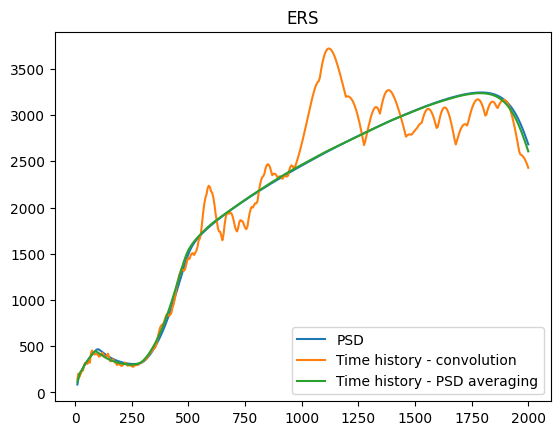

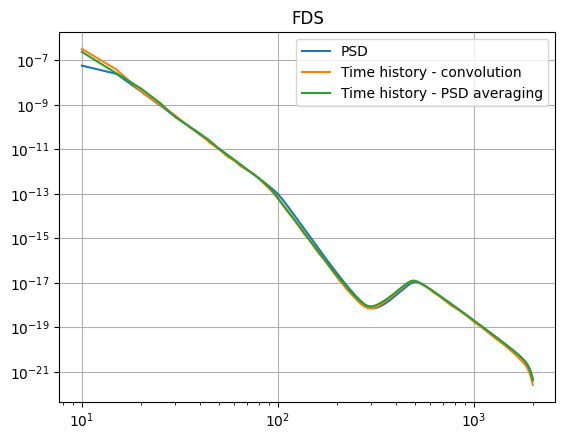

In [15]:
plt.plot(sd_test.f0_range,sd_test.ers,label='PSD')
plt.plot(sd_test_time.f0_range,sd_test_time.ers,label='Time history - convolution')
plt.plot(sd_test_time_2.f0_range,sd_test_time_2.ers,label='Time history - PSD averaging')
plt.title('ERS')
plt.legend()
plt.show()

plt.loglog(sd_test.f0_range,sd_test.fds,label='PSD')
plt.loglog(sd_test_time.f0_range,sd_test_time.fds,label='Time history - convolution')
plt.loglog(sd_test_time_2.f0_range,sd_test_time_2.fds,label='Time history - PSD averaging')
plt.title('FDS')
plt.legend()
plt.grid()
plt.show()

# Random (Non stationary)

### Import data

In [16]:
_psd_data = np.load('test_data/test_psd.npy', allow_pickle=True)
psd_freq = _psd_data[:,0]
psd_data = _psd_data[:,1]

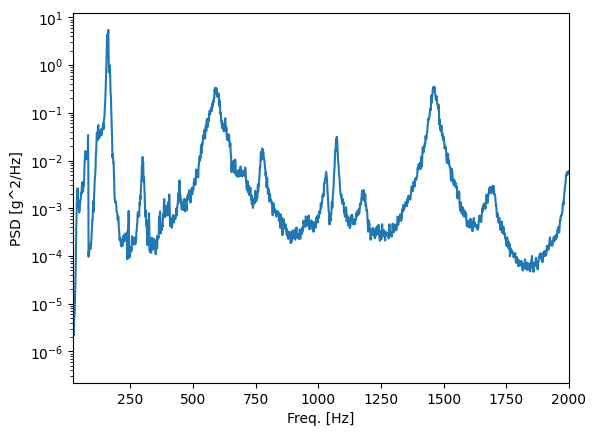

In [17]:
plt.semilogy(psd_freq, psd_data)
plt.xlabel('Freq. [Hz]')
plt.ylabel('PSD [g^2/Hz]')
plt.xlim(20, 2000)
plt.show()

In [18]:
_time_data = np.load('test_data/test_time_history.npy', allow_pickle=True)
time_history_data = _time_data[:,1]
t = _time_data[:,0] 
dt = t[2] - t[1]

Text(0, 0.5, 'Acceleration [g]')

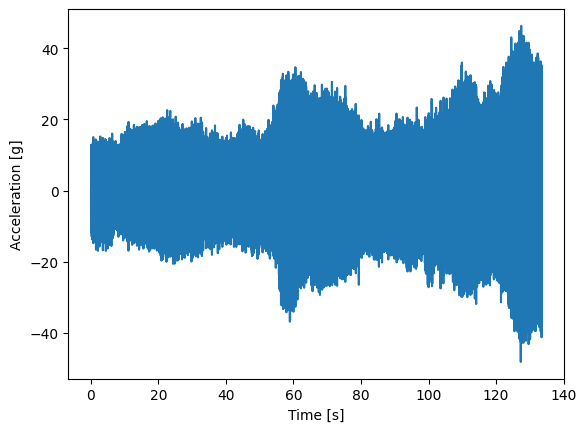

In [31]:
plt.plot(t, time_history_data)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]')


## Instantiate Class

In [20]:
sd3 = pyFDS.SpecificationDevelopment(freq_data=(20,200,5)) #PSD

sd4 = pyFDS.SpecificationDevelopment(freq_data=(20,200,5)) #time history (convolution)

sd5 = pyFDS.SpecificationDevelopment(freq_data=(20,200,5)) #time history (psd averaging)

## Set Load

In [32]:
sd3.set_random_load((psd_data,psd_freq), unit='g',T=t[-1]) #input is tuple (psd array, freq array)

In [33]:
sd4.set_random_load((time_history_data,dt), unit='g') #dt

sd5.set_random_load((time_history_data,dt), unit='g',method='psd_averaging',bins=10) #dt

## Get ERS and FDS

In [34]:
sd3.get_ers()

100%|██████████| 2561/2561 [00:00<00:00, 19389.89it/s]


In [35]:
sd4.get_ers()

Calculating extreme response for each SDOF system...
Both 'dt' and time duration 't_total' are defined. Prioritizing `dt`, `t_total` is calculated from time history and `dt`.


100%|██████████| 37/37 [00:04<00:00,  8.87it/s]


In [36]:
sd5.get_ers()

100%|██████████| 34195/34195 [00:01<00:00, 26205.88it/s]


In [37]:
sd3.get_fds(b=5,C=1,K=1)

100%|██████████| 2561/2561 [00:00<00:00, 26481.57it/s]


In [38]:
sd4.get_fds(b=5,C=1,K=1)

Calculating extreme response for each SDOF system...


100%|██████████| 37/37 [00:10<00:00,  3.64it/s]


In [39]:
sd5.get_fds(b=5,C=1,K=1)

100%|██████████| 34195/34195 [00:01<00:00, 25796.82it/s]


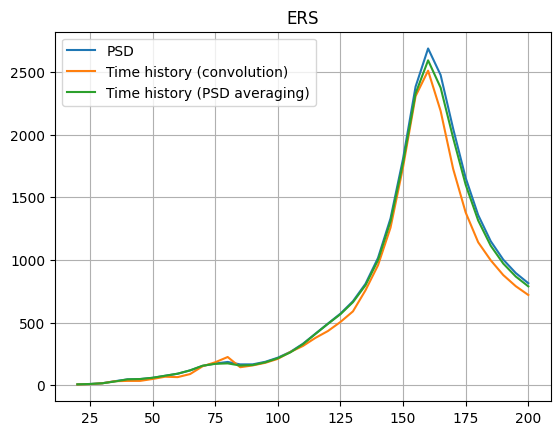

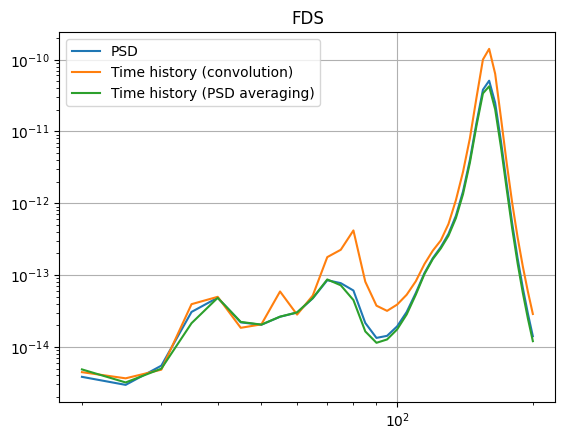

In [40]:
plt.plot(sd3.f0_range,sd3.ers,label='PSD')
plt.plot(sd4.f0_range,sd4.ers,label='Time history (convolution)')
plt.plot(sd5.f0_range,sd5.ers,label='Time history (PSD averaging)')
plt.title('ERS')
plt.legend()
plt.grid()
plt.show()


plt.loglog(sd3.f0_range,sd3.fds,label='PSD')
plt.loglog(sd4.f0_range,sd4.fds,label='Time history (convolution)')
plt.loglog(sd5.f0_range,sd5.fds,label='Time history (PSD averaging)')
plt.title('FDS')
plt.grid()
#plt.xlim(100,200)
#plt.ylim(1e-12,1e-9)
plt.legend()



In [41]:
fs = 10000 # sampling frequency [Hz]


time= 1

N = int(time*fs) # number of data points of time signal
t = np.arange(0,N)/fs # time vector

# define frequency vector and one-sided flat-shaped PSD
freq_flat = np.arange(0, N, 1/time) # frequency vector
freq_flat[0] = 1e-3

PSD = np.zeros(len(freq_flat))
PSD[100:300]=5
PSD[300:600]=10
PSD[600:1000]=2

#PSD /= freq_flat

#get gaussian stationary signal
gausian_signal = es.random_gaussian(N, PSD, fs)

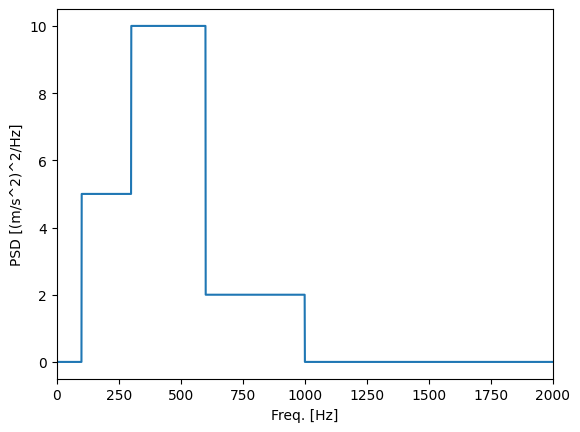

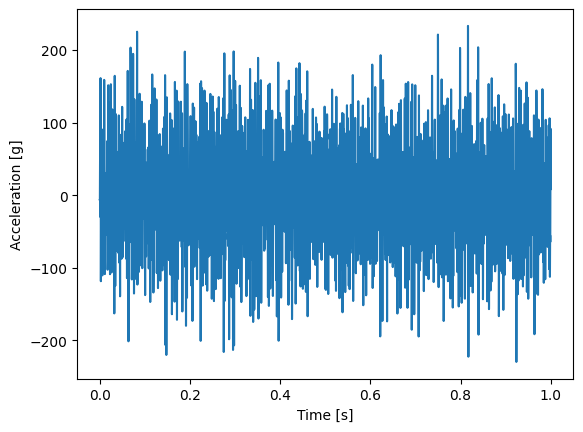

In [42]:
plt.plot(freq_flat, PSD)
plt.xlabel('Freq. [Hz]')
plt.ylabel('PSD [(m/s^2)^2/Hz]')
plt.xlim(0,2000)
plt.show()

plt.plot(t,gausian_signal)
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [g]')
plt.show()

In [43]:
sd_flat_psd = pyFDS.SpecificationDevelopment(freq_data=(5,1500,1),Q=10)
sd_flat_time = pyFDS.SpecificationDevelopment(freq_data=(5,1500,1))
sd_flat_time_2 = pyFDS.SpecificationDevelopment(freq_data=(5,1500,1))

In [44]:
sd_flat_psd.Q

10

## Set Load

In [69]:
sd_flat_psd.set_random_load((PSD,freq_flat), unit='ms2',T=1000) #input is tuple (psd array, freq array)
sd_flat_time.set_random_load((gausian_signal,1/fs), unit='ms2',method='convolution',T=1000) #input is tuple (psd array, freq array)
sd_flat_time_2.set_random_load((gausian_signal,1/fs), unit='ms2',method='psd_averaging',bins=10, T = 1000) #input is tuple (psd array, freq array)

## Get ERS and FDS

In [70]:
sd_flat_psd.get_ers()
sd_flat_time.get_ers()
sd_flat_time_2.get_ers()

100%|██████████| 10000/10000 [00:00<00:00, 10086.71it/s]


Calculating extreme response for each SDOF system...
Both 'dt' and time duration 't_total' are defined. Prioritizing `dt`, `t_total` is calculated from time history and `dt`.


100%|██████████| 501/501 [00:00<00:00, 9784.58it/s]


In [71]:
1e2

100.0

In [72]:
b = 8
A = 1e9
C = A**b
K = 0.5*1e12

In [73]:
sd_flat_psd.get_fds(b=b,C=C,K=K)
sd_flat_time.get_fds(b=b,C=C,K=K)
sd_flat_time_2.get_fds(b=b,C=C,K=K)

100%|██████████| 10000/10000 [00:00<00:00, 10219.69it/s]


Calculating extreme response for each SDOF system...


100%|██████████| 501/501 [00:00<00:00, 9355.45it/s]


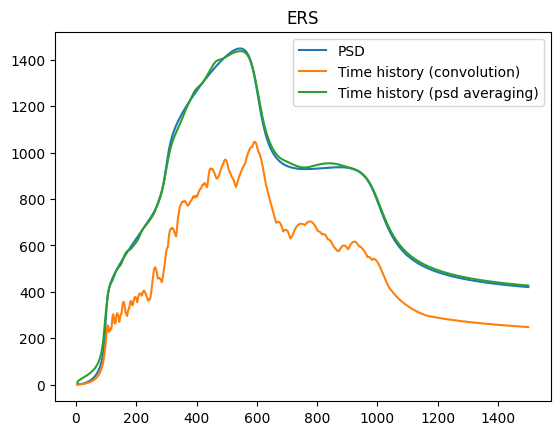

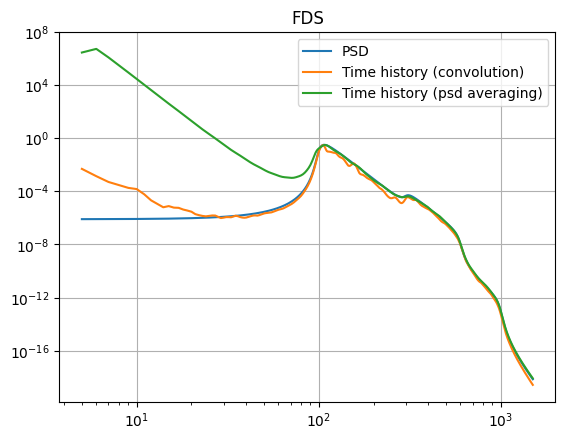

In [74]:
plt.plot(sd_flat_psd.f0_range,sd_flat_psd.ers,label='PSD')
plt.plot(sd_flat_time.f0_range,sd_flat_time.ers,label='Time history (convolution)')
plt.plot(sd_flat_time_2.f0_range,sd_flat_time_2.ers,label='Time history (psd averaging)')
plt.title('ERS')
plt.legend()
plt.show()

plt.semilogy(sd_flat_psd.f0_range,sd_flat_psd.fds,label='PSD')
plt.semilogy(sd_flat_time.f0_range,sd_flat_time.fds,label='Time history (convolution)')
plt.loglog(sd_flat_time_2.f0_range,sd_flat_time_2.fds,label='Time history (psd averaging)')
plt.title('FDS')
plt.legend()
#plt.xlim(80,120)
plt.grid()
plt.show()